In [1]:

from matplotlib import pyplot as plt 
import os 
import cv2 
import imghdr
import tensorflow as tf 

from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.models import load_model

import numpy as np 


In [5]:
'''
generate the  dataset
0 angry
1 happy
2 surprised

'''
data = tf.keras.utils.image_dataset_from_directory(
    r"C:\Users\Eduardo Cadena\Documents\Tecnologico de Monterrey\10mo semestre\AI 2\faces\dataset/", 
    class_names=["angry", "happy", "surprised"],image_size=(48, 48),batch_size=32)

Found 14381 files belonging to 3 classes.


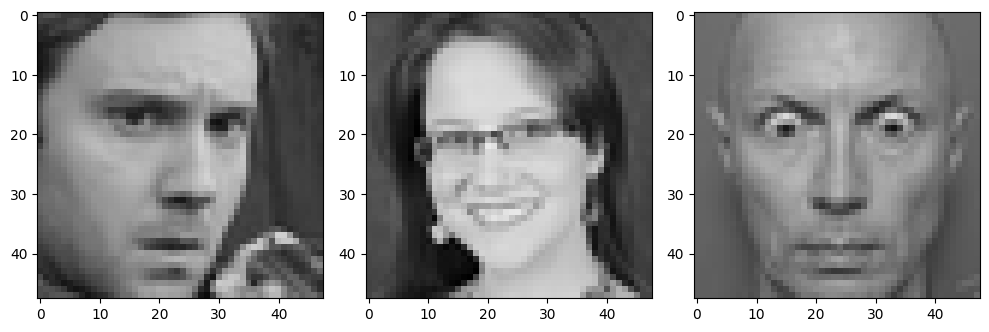

In [6]:
f, ax = plt.subplots(ncols=3, figsize=(10,10))
angry = cv2.imread(r"C:\Users\Eduardo Cadena\Documents\Tecnologico de Monterrey\10mo semestre\AI 2\faces\dataset/angry/im0.png")
happy = cv2.imread(r"C:\Users\Eduardo Cadena\Documents\Tecnologico de Monterrey\10mo semestre\AI 2\faces\dataset/happy/im0.png")
surprised = cv2.imread(r"C:\Users\Eduardo Cadena\Documents\Tecnologico de Monterrey\10mo semestre\AI 2\faces\dataset/surprised/im0.png")
'''
0 angry
1 happy
2 surprised
'''
ax[0].imshow(angry)
ax[1].imshow(happy)
ax[2].imshow(surprised)
f.tight_layout()

In [7]:
img = cv2.imread(r"C:\Users\Eduardo Cadena\Documents\Tecnologico de Monterrey\10mo semestre\AI 2\faces\dataset/angry/im0.png")
print(img.shape)
'''
48 pixels x 48 pixels
3 channels = RGB images 
'''

(48, 48, 3)


'\n48 pixels x 48 pixels\n3 channels = RGB images \n'

In [9]:
'''
Take train,val and test images
'''
lenData=len(data)
train = data.take(int(lenData*.7))
val = data.skip(int(lenData*.7)).take(int(lenData*.2))
test = data.skip(int(lenData*.7)+int(lenData*.2)).take(int(lenData*.1))

In [40]:
'''
implement cnn
'''
model = Sequential()
'''
Added Conv2D, max pooling 
1 stride
kernel 3 3
'''

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(48,48,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

'''flatten  ,dense and output layer'''
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='softmax'))

'''compile the proyect using adam as optimizer'''
model.compile("adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=["accuracy"])

In [43]:
'''
Train the model using early stopping, this avoids overfitting
If the validation loss steadily decreases throughout training, 
that's generally a good indicator that the model is fitting correctly and learning 
to extract relevant features from the data.
'''
callbacks = [ tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3), tf.keras.callbacks.ModelCheckpoint(filepath='faces2.h5', monitor='val_loss', save_best_only=True)] 

model_stats = model.fit(train, epochs=20, validation_data=val, callbacks=callbacks)

Epoch 1/20
315/315 [==============================] - 13s 38ms/step - loss: 1.4764 - accuracy: 0.4771 - val_loss: 1.0135 - val_accuracy: 0.5198
Epoch 2/20
315/315 [==============================] - 13s 40ms/step - loss: 1.0252 - accuracy: 0.5020 - val_loss: 1.0086 - val_accuracy: 0.5281
Epoch 3/20
315/315 [==============================] - 13s 40ms/step - loss: 1.0084 - accuracy: 0.5103 - val_loss: 1.0004 - val_accuracy: 0.5378
Epoch 4/20
315/315 [==============================] - 13s 40ms/step - loss: 0.9212 - accuracy: 0.5729 - val_loss: 0.8708 - val_accuracy: 0.6128
Epoch 5/20
315/315 [==============================] - 13s 41ms/step - loss: 0.8539 - accuracy: 0.6175 - val_loss: 0.8393 - val_accuracy: 0.6281
Epoch 6/20
315/315 [==============================] - 13s 41ms/step - loss: 0.8081 - accuracy: 0.6410 - val_loss: 0.8455 - val_accuracy: 0.6330
Epoch 7/20
315/315 [==============================] - 13s 41ms/step - loss: 0.7493 - accuracy: 0.6678 - val_loss: 0.7538 - val_accuracy:

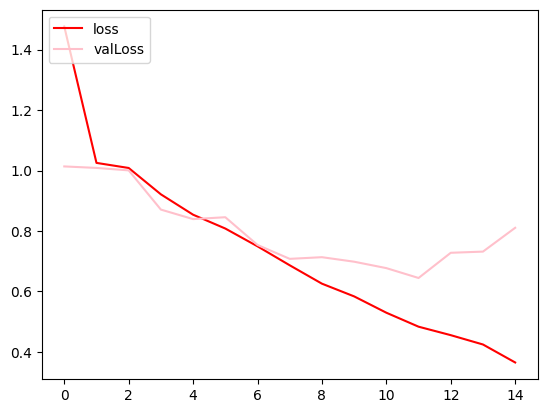

<Figure size 640x480 with 0 Axes>

In [44]:
fig = plt.figure()
plt.plot(model_stats.history['loss'], color='red', label='loss')
plt.plot(model_stats.history['val_loss'], color='pink', label='valLoss')
plt.legend(loc="upper left")
plt.show()
plt.savefig('Loss.png')

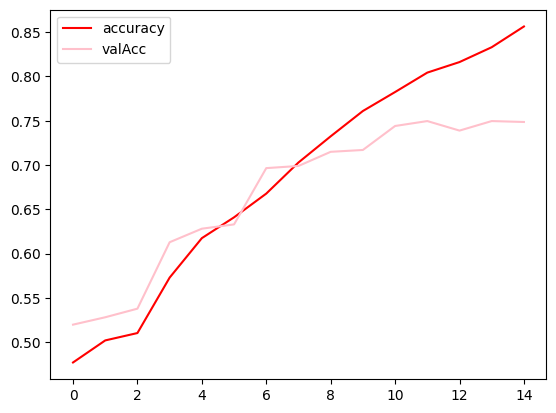

<Figure size 640x480 with 0 Axes>

In [45]:
fig = plt.figure()
plt.plot(model_stats.history['accuracy'], color='red', label='accuracy')
plt.plot(model_stats.history['val_accuracy'], color='pink', label='valAcc')
plt.legend(loc="upper left")
plt.show()
plt.savefig('Accuracy.png')

In [22]:
from sklearn.metrics import accuracy_score
import numpy as np
y_true = []
y_pred = []
bcc = load_model('faces.h5')
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = bcc.predict(X)
    pred = np.argmax(yhat, axis=1)
    pre.update_state(y, pred)
    re.update_state(y, pred)
    y_true.extend(y)
    y_pred.extend(pred)

accuracy = accuracy_score(y_true, y_pred)
print("Accuracy = " + str(round(accuracy*100, 2)) + "%")

1/1 [==============================] - 0s 75ms/step
Accuracy = 79.38%


1/1 [==============================] - 0s 96ms/step
angry: 0.0012139691%
happy: 0.00033736127%
surprised: 0.9984486%
SURPRISED


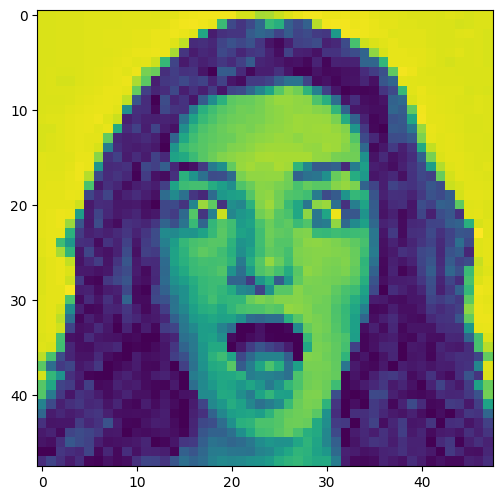

In [4]:
bcc = load_model('faces.h5')
img = cv2.imread(r"C:\Users\Eduardo Cadena\Documents\Tecnologico de Monterrey\10mo semestre\AI 2\faces\test/surprised.png")
'''
resize the image
48 x 48
'''
test_image = tf.image.resize(img, (48,48))
newimage=np.expand_dims(test_image, 0)
prediction = bcc.predict(newimage) 
    
'''
since we have a probability vector we are getting the max value on it 
'''
max_val = max(prediction[0]) 
index = np.where(prediction[0] == max_val) 


'''
0 angry
1 happy
2 surprised
'''

print("angry: " +str(prediction[0][0])+"%")
print("happy: "+str(prediction[0][1])+"%")
print("surprised: "+str(prediction[0][2])+"%")
if(index[0][0] == 0):
    emotion="angry"
elif(index[0][0]== 1):
    emotion="happy"
else:
    emotion="surprised"


print(emotion.upper())
plt.figure(figsize=(20, 20))
plt.subplot(231)
plt.imshow(test_image[:, :,0])
plt.show()